# Multivariate Linear Regression

### Import packages 

In [92]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import statsmodels
from scipy.stats import iqr
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

### Import Data

In [93]:
data = pd.read_csv('salary.csv')

### Exploring Data

In [94]:
data.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

*There is only one missing value in salary*

### Filling in null values and dropping duplicates

In [95]:
data['salary'].fillna(data['salary'].mean(),inplace = True)
data = data.drop_duplicates()

### Splitting the data

In [96]:
y = data.salary
x = data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

*Now that we have split the data and our target feature is salary, 
lets look at features that are highly correlated with salary.*

In [97]:
data_corr = x_train.corr().iloc[:,0]
data_corr

salary         1.000000
exprior        0.126978
yearsworked    0.606048
yearsrank      0.613583
market         0.396942
degree         0.031467
otherqual      0.195508
position       0.711832
male           0.345277
Field         -0.503231
yearsabs      -0.089951
Name: salary, dtype: float64

Features withe the strongest correlation ( > |0.45|)

In [98]:
strong_data = data_corr[abs(data_corr) > 0.45].sort_values(ascending=False)
strong_data

salary         1.000000
position       0.711832
yearsrank      0.613583
yearsworked    0.606048
Field         -0.503231
Name: salary, dtype: float64

*The features of interest with regard to salary are:*
- Years worked in this field
- Years worked at current rank 
- Position
- Field of work

*as they have the higher correlation*

*We further need to see if the relationships are significant.* 

### Descriptive table

In [99]:
data_num.describe()

,salary,yearsworked,yearsrank,position,Field
count,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,12.852140,7.052529,2.132296,2.529183
std,12672.762650,9.444695,6.414771,0.820075,1.127420
min,29000.000000,0.000000,0.000000,1.000000,1.000000
25%,40000.000000,4.000000,2.000000,1.000000,2.000000
50%,50165.500000,12.000000,5.000000,2.000000,3.000000
75%,60306.250000,22.000000,12.000000,3.000000,4.000000
max,96156.000000,41.000000,28.000000,3.000000,4.000000


### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb25d1f3450>,
      dtype=object)

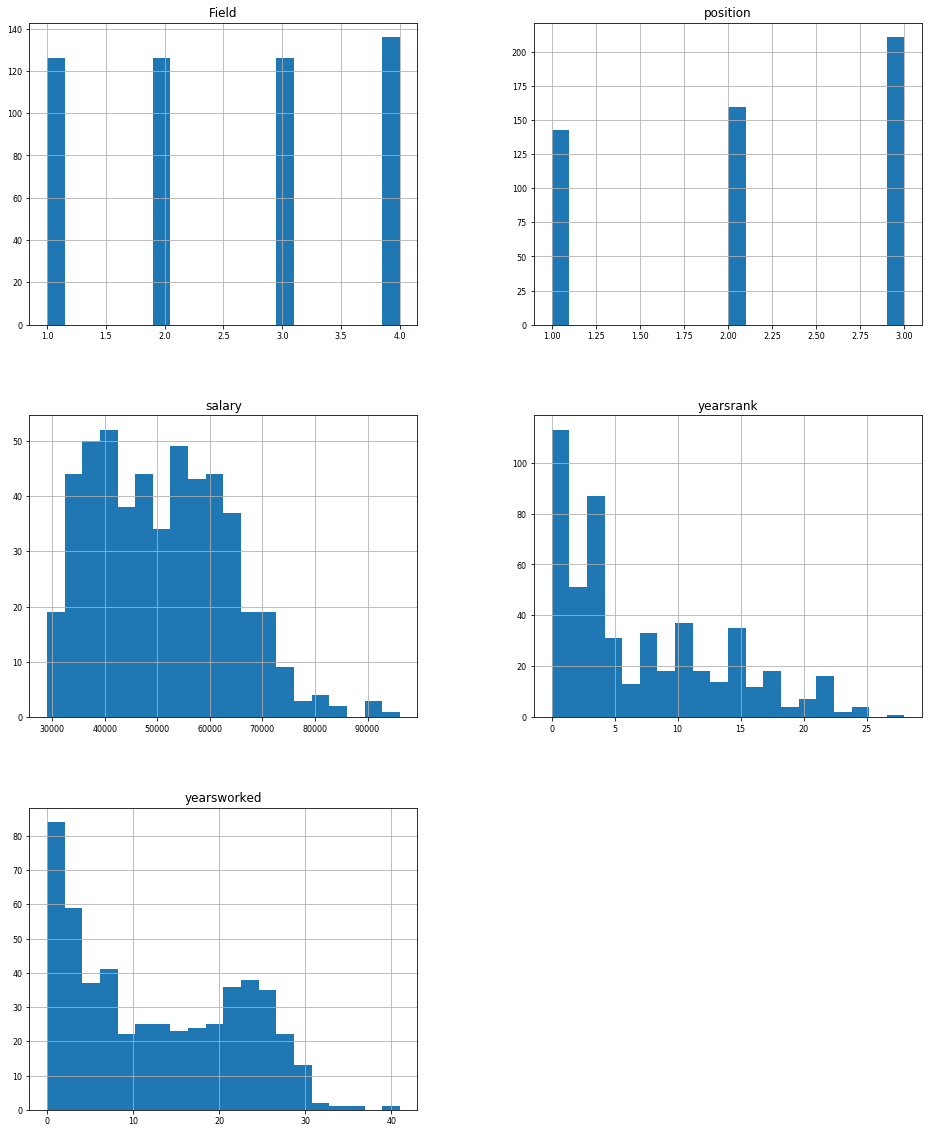

In [100]:
data_num.hist(figsize=(16, 20),bins=20, xlabelsize=8, ylabelsize=8)

*From the above histograms of the features of interest it is clear that Position and Field are categorical data.*
- Salary 
    - There are possible outliers
    - it is skewed to the right 
    - A lot of individuals earn between 33000 dollars & 75000 dollars


- Years worked in this field
    - There are possible outliers
    -i t is skewed to the right
    - A lot of individuals have worked between 0 years & 29 years
    

- Years worked at current rank
    - It is skewed to the right
    - There are possible outliers
    - Most individuals have worked at the current rank for years between 0 & 5 years.
    

### Scatter plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb25d1f3d10>,
      dtype=object)

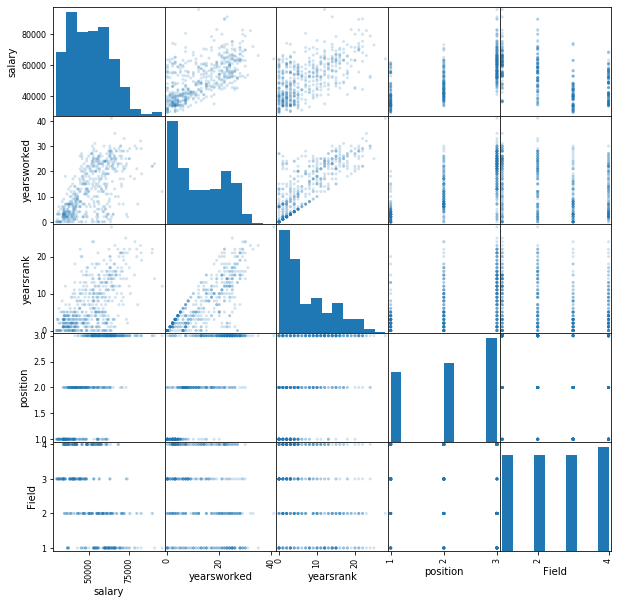

In [101]:
scatter_matrix(data_num, alpha=0.2, figsize=(10, 10))

*Looking at the above scatter matrix:*
- The first row from top of the matrix
    - It shows the realtionship of salary with other features of interest.
        - There is a linear relationship between salary & years worked in the current field.
        - There is a linear relationship between salary & Years worked at current rank.
        - There is no defined relationship with salary for position and Field.
- The matrix can be used to see if there is a relationship amongst the features other than the relationship with salary 
    

*The Field feature and Position feature are categorical. We therefore have to transorm the data.*

### Transforming data (get_dummies)

In [102]:
dict1 = {1:'Engineering', 2:'Finance', 3:'Human Resources', 4:'Marketing'}
data['Field'] = data.Field.map(dict1)
dict2 ={0:'female', 1: 'male'}
data['male'] =data.male.map(dict2)
dict3={1:'Junior', 2:'Manager', 3:'Executive'}
data['position']=data.position.map(dict3)
dict4 ={0:'no other qual', 1:'yes other qual'}
data['otherqual'] = data.otherqual.map(dict4)
dict5 = {0:'no degree', 1:'yes degree'}
data['degree']= data.degree.map(dict5)
data = pd.get_dummies(data, prefix_sep='_', drop_first=True)


In [103]:
dict1 = {1:'Engineering', 2:'Finance', 3:'Human Resources', 4:'Marketing'}
x_train['Field'] = x_train.Field.map(dict1)
dict2 ={0:'female', 1: 'male'}
x_train['male'] =x_train.male.map(dict2)
dict3={1:'Junior', 2:'Manager', 3:'Executive'}
x_train['position']=x_train.position.map(dict3)
dict4 ={0:'no other qual', 1:'yes other qual'}
x_train['otherqual'] = x_train.otherqual.map(dict4)
dict5 = {0:'no degree', 1:'yes degree'}
x_train['degree']= x_train.degree.map(dict5)


/home/olebogeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/olebogeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/olebogeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [108]:
x_train1 = pd.get_dummies(x_train, prefix_sep='_', drop_first=True)

In [109]:
desired_features = x_train1[['salary','yearsworked','yearsrank','market','position_Junior','position_Manager','Field_Finance','Field_Marketing','Field_Human Resources']]

In [110]:
desired_features_corr = desired_features.corr()
desired_features_corr.style.background_gradient(cmap = 'Purples')

,salary,yearsworked,yearsrank,market,position_Junior,position_Manager,Field_Finance,Field_Marketing,Field_Human Resources
salary,1,0.606048,0.613583,0.396942,-0.54014,-0.204862,0.211728,-0.221691,-0.422352
yearsworked,0.606048,1,0.835483,-0.0652922,-0.60103,-0.0848521,0.152988,-0.126791,-0.249087
yearsrank,0.613583,0.835483,1,-0.0166195,-0.376108,-0.0989205,0.182342,-0.141094,-0.262462
market,0.396942,-0.0652922,-0.0166195,1,0.0175183,-0.031137,0.116448,-0.0525811,-0.226441
position_Junior,-0.54014,-0.60103,-0.376108,0.0175183,1,-0.426067,-0.180059,0.13952,0.208201
position_Manager,-0.204862,-0.0848521,-0.0989205,-0.031137,-0.426067,1,0.059004,-0.0282358,0.118862
Field_Finance,0.211728,0.152988,0.182342,0.116448,-0.180059,0.059004,1,-0.334279,-0.344498
Field_Marketing,-0.221691,-0.126791,-0.141094,-0.0525811,0.13952,-0.0282358,-0.334279,1,-0.324648
Field_Human Resources,-0.422352,-0.249087,-0.262462,-0.226441,0.208201,0.118862,-0.344498,-0.324648,1


In [113]:
print('For yearsworked, the correlation and p_value are:',stats.pearsonr(x_train1['yearsworked'],x_train['salary']))
print('For yearsrank, the correlation and p_value are:',stats.pearsonr(x_train1['yearsrank'],x_train1['salary']))
print('For junior position, the correlation and p_value are:',stats.pearsonr(x_train1['position_Junior'],x_train1['salary']))
print('For manager position, the correlation and p_value are:',stats.pearsonr(x_train1['position_Manager'],x_train1['salary']))
print('For finance field, the correlation and p_value are:',stats.pearsonr(x_train1['Field_Finance'],x_train1['salary']))
print('For marketing field, the correlation and p_value are:',stats.pearsonr(x_train1['Field_Marketing'],x_train1['salary']))
print('For HR field, the correlation and p_value are:',stats.pearsonr(x_train1['Field_Human Resources'],x_train1['salary']))


For yearsworked, the correlation and p_value are: (0.6060480089102416, 2.266003579671186e-37)
For yearsrank, the correlation and p_value are: (0.6135825833963294, 1.6436000944300498e-38)
For junior position, the correlation and p_value are: (-0.5401397251802958, 1.4064064406897917e-28)
For manager position, the correlation and p_value are: (-0.20486237684472655, 9.245120949564643e-05)
For finance field, the correlation and p_value are: (0.2117277974827107, 5.263358807296724e-05)
For marketing field, the correlation and p_value are: (-0.22169099026682754, 2.2486390259968748e-05)
For HR field, the correlation and p_value are: (-0.4223524165541593, 5.792266932253095e-17)


*The above correlationship map shows the relationship between the features.* 
- It can show if there is multicollinearity that exist.
- The darker the color on the block the higher the correlation.
    
*From the features we assume to be desired, the ones with strong correlation with salary are:*
- Yearsworked
- Yearsrank
- Position 

*But there is a strong correlation between yearsworked and yearsank.
Therefore the features chosen for fitting a model are:*
- yearsworked
- position

Due to the low correlation between salary and the Field categories, we decided to not include Field in our model.

In [120]:
dict1 = {1:'Engineering', 2:'Finance', 3:'Human Resources', 4:'Marketing'}
x_test['Field'] = x_test.Field.map(dict1)
dict2 ={0:'female', 1: 'male'}
x_test['male'] =x_test.male.map(dict2)
dict3={1:'Junior', 2:'Manager', 3:'Executive'}
x_test['position']=x_test.position.map(dict3)
dict4 ={0:'no other qual', 1:'yes other qual'}
x_test['otherqual'] = x_test.otherqual.map(dict4)
dict5 = {0:'no degree', 1:'yes degree'}
x_test['degree']= x_test.degree.map(dict5)
x_test1 = pd.get_dummies(x_test, prefix_sep='_', drop_first=True)

/home/olebogeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/olebogeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/olebogeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [121]:
# Field = pd.get_dummies(x_train['Field'],prefix_sep='_',drop_first=False)
# Field.set_index('Human Resources')

In [122]:
# dat_num = data_num.drop(['salary'],axis=1)
# plt.figure(figsize=(15,15))
# ax = sns.boxplot(data=dat_num,orient='h' ,palette='Set2')


## Fitting the model for all the features

In [123]:
x_train1 = x_train1.drop('salary',axis=1)

In [124]:
import statsmodels.api as sm
x_train2 = sm.add_constant(x_train1)
model = sm.OLS(y_train,x_train2).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     123.3
Date:                Fri, 21 Feb 2020   Prob (F-statistic):          5.35e-121
Time:                        15:39:54   Log-Likelihood:                -3596.9
No. Observations:                 359   AIC:                             7222.
Df Residuals:                     345   BIC:                             7276.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     3.189e+04   3555.735      8.969      0.000    2.49e+04    3.89e+04
exprior                    114.6200     81.794      1.401      0.162     -46.258     275.498
yearsworked               -275.5430    102.675     -2.684      0.008    -477.490     -73.596
yearsrank                  938.0919    100.948      9.293      0.000     739.541    1136.643
market                     3.03e+04   2155.764     14.056      0.000    2.61e+04    3.45e+04
yearsabs                   -12.3876     25.590     -0.484      0.629     -62.719      37.944
degree_yes degree        -1773.4192   1810.782     -0.979      0.328   -5334.982    1788.143
otherqual_yes other qual  1522.8107   1492.764      1.020      0.308   -1413.253    4458.875
position_Junior          -1.752e+04   1463.819    -11.968      0.000   -2.04e+04   -1.46e+04
position_Manager         -1.078e+04    956.795    -11.269      0.000   -1.27e+04   -8900.647
male_male                  446.6965   1024.288      0.436      0.663   -1567.939    2461.332
Field_Finance            -2777.4886    832.861     -3.335      0.001   -4415.614   -1139.364
Field_Human Resources    -5407.3438    951.781     -5.681      0.000   -7279.368   -3535.320
Field_Marketing          -5314.8246    893.750     -5.947      0.000   -7072.710   -3556.940
==============================================================================
Omnibus:                       29.201   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.537
Skew:                           0.553   Prob(JB):                     2.13e-10
Kurtosis:                       4.324   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*The R-squared is 0.823 which means about 82% of the data is exlained by this model.*
*Looking at the P-values, most variables do not have a significant relationship with salary.*

## Fitting the model for the desired features

In [125]:
x_train3 = x_train1[['yearsrank','position_Junior','position_Manager']]
x_train3 = sm.add_constant(x_train3)
model = sm.OLS(y_train,x_train3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     192.0
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           5.59e-74
Time:                        15:40:14   Log-Likelihood:                -3734.6
No. Observations:                 359   AIC:                             7477.
Df Residuals:                     355   BIC:                             7493.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.451e+04   1031.587     52.845      0.000    5.25e+04    5.65e+04
yearsrank          699.3902     74.068      9.443      0.000     553.723     845.057
position_Junior  -1.702e+04   1185.740    -14.352      0.000   -1.93e+04   -1.47e+04
position_Manager -1.158e+04   1049.394    -11.033      0.000   -1.36e+04   -9514.423
==============================================================================
Omnibus:                       63.565   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.385
Skew:                           1.132   Prob(JB):                     3.20e-21
Kurtosis:                       4.087   Cond. No.                         37.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*There Rsquared value of this model is 0.488. Which tells that the model explains about 48% of th observed points.*


*What we get from this model is that:*
 - For every 1 unit increase in yearsranked the employee salary will increase by 699.3902 dollars.
 - For a junior position the employee will earn less by 17020 dollars.
 - For manager position the employee will earn less by by 11580 dollars.
 - According to this model the lower the rank of your position the lower the employee salary.
 - For any employee the employee will earn atleast 54510 dollars.
    

In [141]:
# Concatenate xtrain3 and ytrain
x_train3 = x_train3.drop(["const"], axis = 1)
desired_data = pd.concat([y_train, x_train3], axis = 1)
desired_data

KeyError: "['const'] not found in axis"

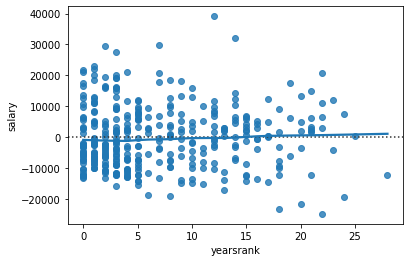

In [145]:
x = desired_data['yearsrank'] #,'position_Junior','position_Manager']
y = desired_data['salary']

sns.residplot(x, y, data = desired_data, lowess = True)